In [1]:
import os
import json
import pprint
import requests
import requests.exceptions
import pandas as pd

In [43]:
url = "https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi"

response_type = ['json', 'dataframe']

In [44]:
def get_api_response(url, response_type):
    try:
        response = requests.get(url)
        response.raise_for_status()
    #all the expection errors
    except requests.exceptions.HTTPError as errh:
        return "An Http Error occurred: " + repr(errh)
    except requests.exceptions.ConnectionError as errc:
        return "An Error Connecting to the API occurred: " + repr(errc)
    except requests.exceptions.Timeout as errt:
        return "A Timeout Error occurred: " + repr(errt)
    except requests.exceptions.RequestException as err:
        return "An Unknown Error occurred: " + repr(err)

    if response_type == 'json':
        result = json.dumps(response.json(), sort_keys=True, indent=4)
    elif response_type == 'dataframe':
        result = pd.json_normalize(response.json())
    else:
        result = "An unhandled error has occurred!"

    return result

In [45]:
pip install schedule

In [46]:
import schedule
import time

def schedule_data():
  df = get_api_response(url, response_type[1])

  for _ in range (60):  # executes 60 times (for 1 hour)
    df.add(get_api_response(url, response_type[1])) # adding the api call to the dataframe
    time.sleep(60)  # sleeps for 60 seconds in order to run for the duration of the hour

In [47]:
schedule_data()

   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time
0   13824  3.14152  2024-04-29 19:24:58
   factor       pi                 time


KeyboardInterrupt: 

**SCREENSHOT SHOWING CODE FUNCTIONALITY**

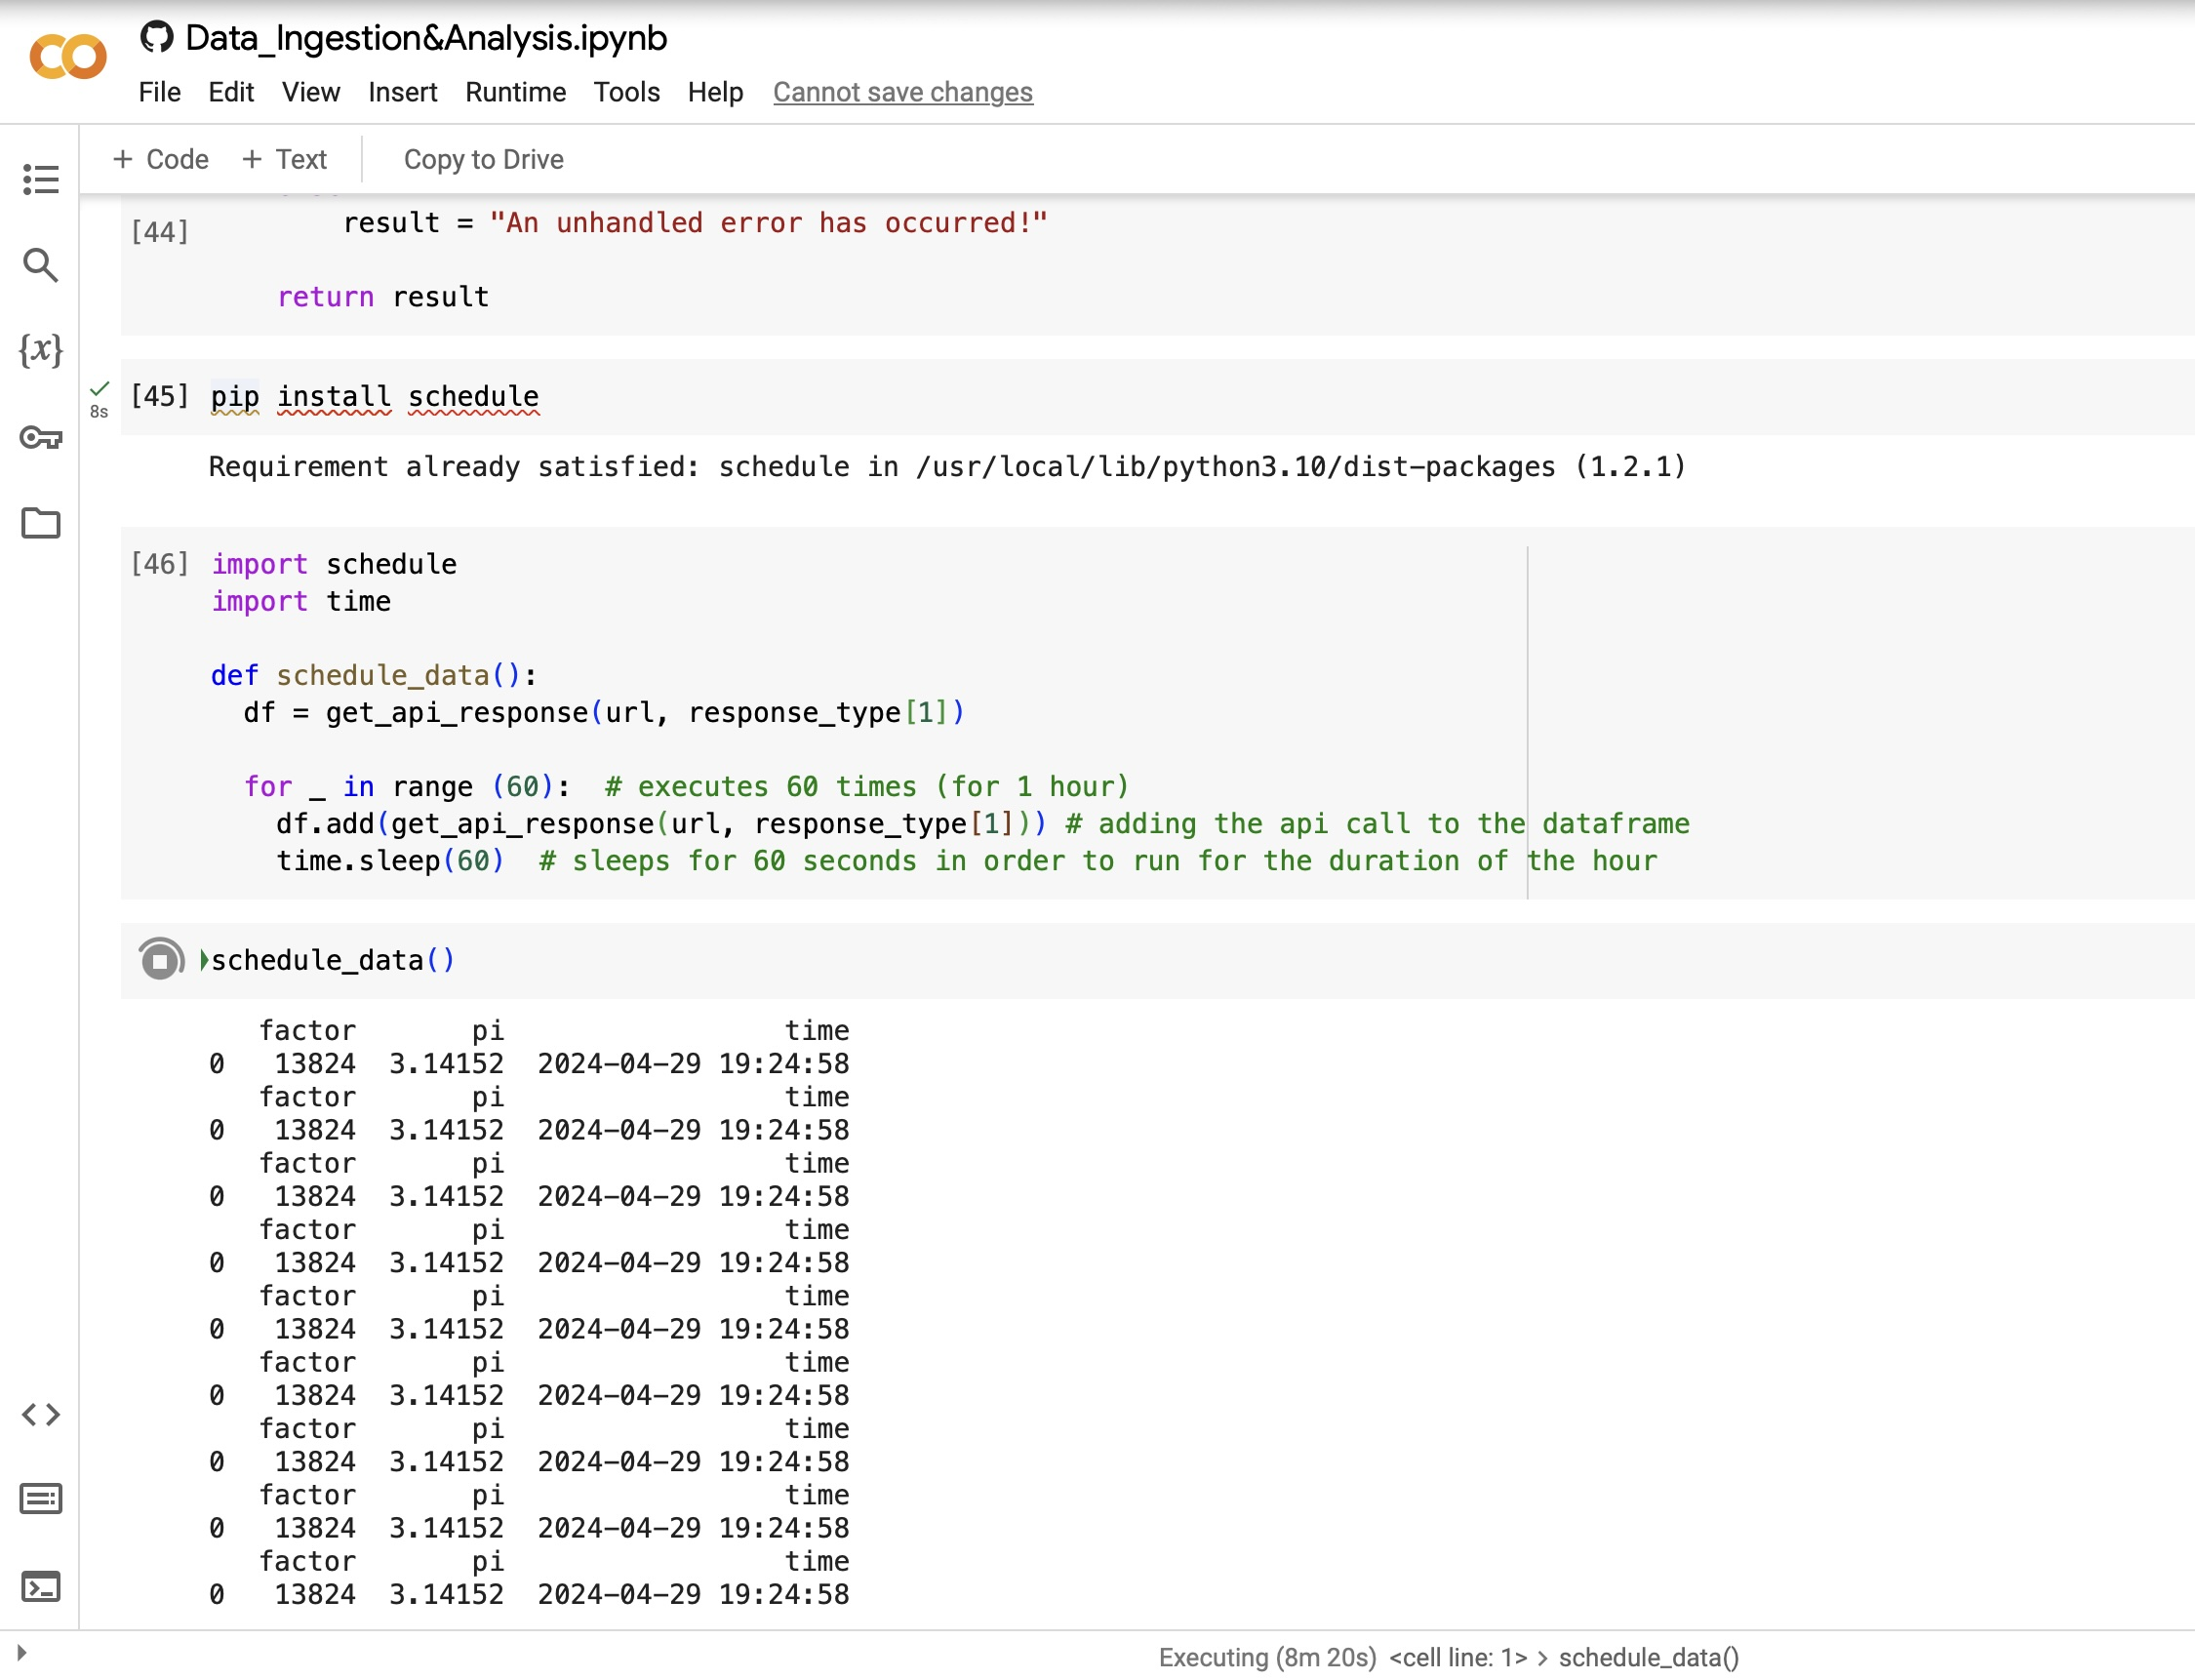